<a href="https://colab.research.google.com/github/Alexandre77777/computer_math/blob/main/5.%20%D0%91%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B0%20Pandas.%20%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9%20%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%965_%D0%91%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B0_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №3. Библиотека Pandas. Визуальный анализ данных

## Комплексное задание №1. Применение основных методов для анализа данных

1. Скачайте этот блокнот к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература
- [**Блокнот с теорией**](https://colab.research.google.com/drive/1SLqmaYz4xEsxVV-LGwb3ityheBTzHJQu?usp=sharing)
- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с Вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [ ]:
%matplotlib inline
import pandas as pd
pd.__version__

'2.2.3'

Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [ ]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values=' ?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [ ]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [ ]:
# shape позволяет узнать размерность
df.shape

(32561, 15)

3) Какие типы данных у элементов этого датасета?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


4) Какие признаки имеют пропуски?

In [ ]:
# Функция isnull() используется для обнаружения отсутствующих значений в объекте, который может быть в виде серии, фрейма данных или отдельного элемента
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ:

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [ ]:
# Метод value_counts в Pandas позволяет подсчитать количество вхождений каждого уникального значения в столбце
workclass = df['workclass'].value_counts()

print(workclass)

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


7) Какой средний возраст женщин и мужчин?

In [ ]:
# Сгруппировать по полу и вычислить средний возраст

df_mean_age = df.groupby('sex')['age'].mean()
print(df_mean_age)

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64


8) Постройте гистограмму(bar) распределения образования людей (education)

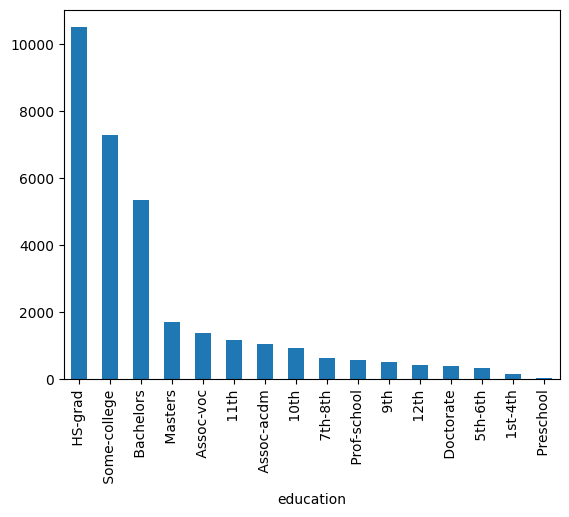

In [ ]:
education = df['education'].value_counts().plot(kind='bar')

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак income) и тех, кто получает менее 50K в год?

In [ ]:
df_mean_std_age_income = df.groupby('income')['age'].agg(['mean', 'std'])
print(df_mean_std_age_income)

             mean        std
income                      
<=50K   36.783738  14.020088
>50K    44.249841  10.519028


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [ ]:
ed_grade = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
income_50 = df[df['income'] == '>50K']

# метод any() в Pandas проверяет, есть ли в DataFrame хотя бы одно ненулевое значение или логическое «True»
if (~income_50['education'].isin(ed_grade)).any():
    print("Нет, есть люди, которые получают больше 50K и не имеют высшего образования.")
else:
    print("Да, утверждение верное.")

Да, утверждение верное.


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [ ]:
marr_gr = [' Married-civ-spouse', ' Married-spouse-absent', ' Married-AF-spouse']
men = df[df['sex'] == ' Male']

married = men[men['marital.status'].isin(marr_gr)].value_counts().sum()
married_50K = men[(men['income'] == ' >50K') & (men['marital.status'].isin(marr_gr))].value_counts().sum()

free_men = men[~men['marital.status'].isin(marr_gr)].value_counts().sum()
free_men_50K = men[(men['income'] == ' >50K') & (~men['marital.status'].isin(marr_gr))].value_counts().sum()

print("Доля зарабатывающих >50K среди женатых:", married_50K / married)
print("Доля зарабатывающих >50K среди холостых:", free_men_50K / free_men)

Доля зарабатывающих >50K среди женатых: 0.4479843444227006
Доля зарабатывающих >50K среди холостых: 0.08849441157133466


In [ ]:
# inplace - это параметр, который определяет, модифицирует ли операция переименования исходный DataFrame (inplace=True) или возвращает новый DataFrame с переименованными столбцами (inplace=False)
df.rename(columns={'marital.status': 'marital_status'}, inplace=True)

print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


In [ ]:
man_m = df[df['sex'] == 'Male']['marital_status']
marry = [marital_status.split('-')[0] for marital_status in man_m]
print(marry)

[]


In [ ]:
man_m = df[df['sex'] == 'Male']['marital_status']
print(man_m.head())

Series([], Name: marital_status, dtype: object)


12) Постройте [сводную таблицу](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) для отображения зависимостей среднего времени работы (hours.per.week) с доходом (income) для каждой страны (native.country).  


> Пример фрагмента таблицы:



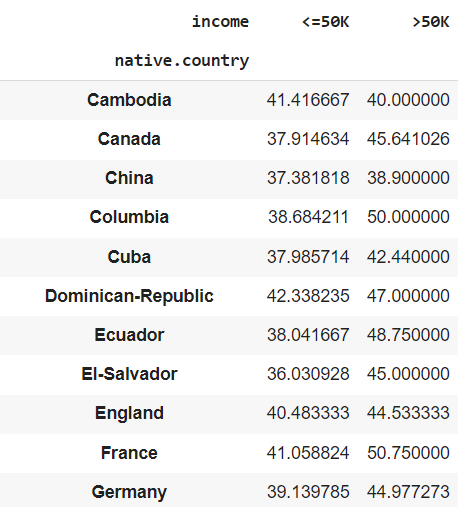

In [ ]:
pivot_table = df.pivot_table(
    values='hours.per.week',       # Столбец, по которому считаем среднее
    index='native.country',        # Столбец стран
    columns='income',              # Столбец дохода
    aggfunc='mean',                # Функция агрегации (среднее)
)
print(pivot_table)

income                          <=50K       >50K
native.country                                  
Cambodia                    41.416667  40.000000
Canada                      37.914634  45.641026
China                       37.381818  38.900000
Columbia                    38.684211  50.000000
Cuba                        37.985714  42.440000
Dominican-Republic          42.338235  47.000000
Ecuador                     38.041667  48.750000
El-Salvador                 36.030928  45.000000
England                     40.483333  44.533333
France                      41.058824  50.750000
Germany                     39.139785  44.977273
Greece                      41.809524  50.625000
Guatemala                   39.360656  36.666667
Haiti                       36.325000  42.750000
Holand-Netherlands          40.000000        NaN
Honduras                    34.333333  60.000000
Hong                        39.142857  45.000000
Hungary                     31.300000  50.000000
India               

13) Постройте сводную таблицу для сравнения уровня образования и разности между capital.gain и capital.loss по следующему алгоритму:&nbsp;  
1. Создайте вспомогательную таблицу (датафрейм) и добавьте в неё столбец "education" из целевой таблицы
2. Добавьте во вспомогательную таблицу ещё один столбец "capital.diff", значиниями которого будут являться разности столбцов capital.gain и capital.loss целевой таблицы
3. Удалите во вспомогательной таблице все строки, в которых значение столбца "capital.diff" равно нулю  
&nbsp; Подсказка:
```
summary_table = summary_table[summary_table['capital.diff'] != 0 ]
```
4. Для набора значений из столбца "capital.diff", необходимо сформировать 10 категорий (кластеров), это можно сделать с помощью математических функций, типа log, извлечение корня N-ой степени и округления, для последующего перехода к категориальным признакам.  
  * В нашем случае, можно воспользоваться методом [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) и равномерно разделить наш набор данных на целевое количество категорий
5. Добавьте во вспомогательную таблицу столбец "categories", и проинициализируйте его значениями категорий, которые возвращает метод pd.qcut()  
&nbsp; Пример:
```
summary_table['categories'] = pd.qcut(summary_table["capital.diff"], q = 10)

6. Постройте сводную таблицу с помощью метода pivot_table(),

Примерная структура таблицы (в качестве значений выводится количество людей, относящихся к той или иной группе):

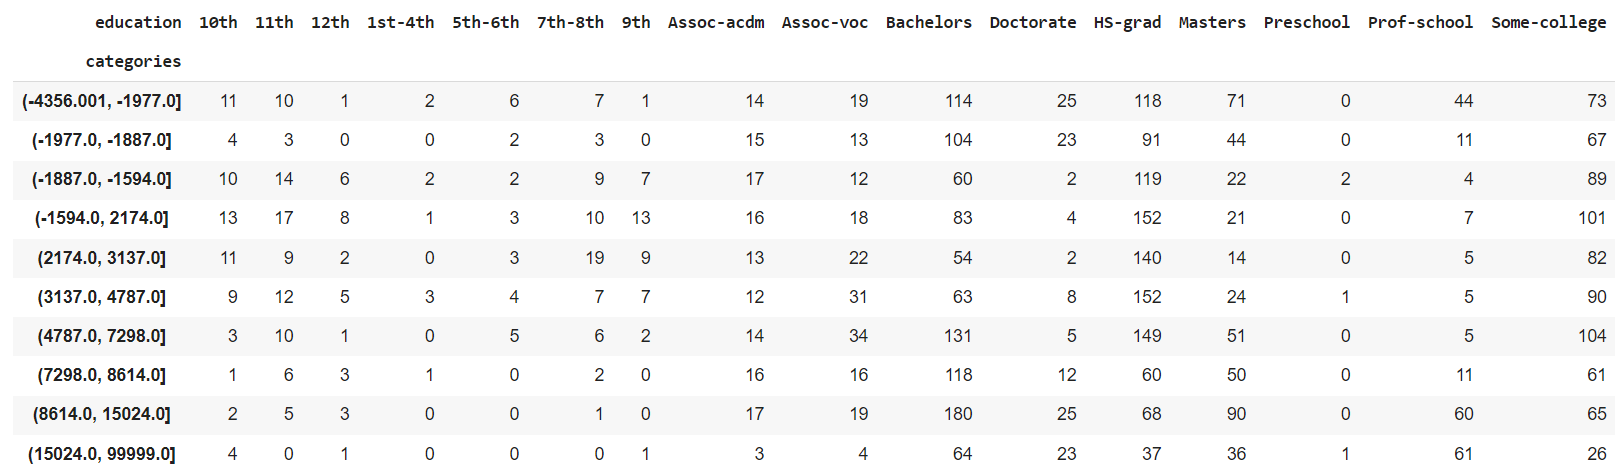

In [ ]:
# 1 Создайте вспомогательную таблицу
df_2 = df[['education']].copy()

# 2 Добавьте во вспомогательную таблицу ещё один столбец "capital.diff"
df_2['capital.diff'] = df['capital.gain'] - df['capital.loss']

# 3 Удалите в столбц "capital.diff" равно нулю
df_2 = df_2[df_2['capital.diff'] != 0 ]

# 4 capital.diff", необходимо сформировать 10 категорий (кластеров)
pd.qcut(df_2['capital.diff'], q=10)

# 5 Добавьте во вспомогательную таблицу столбец "categories"
df_2['categories'] = pd.qcut(df_2["capital.diff"], q = 10)

# 6 Постройте сводную таблицу с помощью метода pivot_table(),
pivot_table_2 = df_2.pivot_table(
    values='education',       # Столбец, по которому считаем среднее
    index='categories',        # Столбец стран
    columns='education',              # Столбец дохода
    aggfunc='count',                # Функция агрегации (среднее)
)

#print(pivot_table_2)
pivot_table_2

C:\Users\Тимофей\AppData\Local\Temp\ipykernel_21468\3465121856.py:17: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_2 = df_2.pivot_table(


education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
categories,,,,,,,,,,,,,,,,
"(-4356.001, -1977.0]",11,10,1,2,6,7,1,14,19,114,25,118,71,0,44,73
"(-1977.0, -1887.0]",4,3,0,0,2,3,0,15,13,104,23,91,44,0,11,67
"(-1887.0, -1594.0]",10,14,6,2,2,9,7,17,12,60,2,119,22,2,4,89
"(-1594.0, 2174.0]",13,17,8,1,3,10,13,16,18,83,4,152,21,0,7,101
"(2174.0, 3137.0]",11,9,2,0,3,19,9,13,22,54,2,140,14,0,5,82
"(3137.0, 4787.0]",9,12,5,3,4,7,7,12,31,63,8,152,24,1,5,90
"(4787.0, 7298.0]",3,10,1,0,5,6,2,14,34,131,5,149,51,0,5,104
"(7298.0, 8614.0]",1,6,3,1,0,2,0,16,16,118,12,60,50,0,11,61
"(8614.0, 15024.0]",2,5,3,0,0,1,0,17,19,180,25,68,90,0,60,65


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [ ]:
women = df[df['sex'] == ' Female']

# метод apply() позволяет применять функцию к каждому элементу серии данных.
# С его помощью можно преобразовывать, фильтровать или агрегировать данные на основе конкретных условий или требований
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html
tab = women.groupby('native.country')['income'].apply(lambda x: (x == '>50K').mean())
sort_tab = tab.sort_values(ascending=False)

print("Женщины каких стран получают в среднем большую зарплату (>50K) чаще:")

sort_tab.head()

Женщины каких стран получают в среднем большую зарплату (>50K) чаще:


native.country
Cambodia    0.0
Italy       0.0
Japan       0.0
Laos        0.0
Mexico      0.0
Name: income, dtype: float64

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [ ]:
import numpy as np

df['magic_salary'] = df.apply(lambda ms: np.random.randint(0, 51) if ms['income'] == '<=50K' else np.random.randint(51, 201), axis=1)
sr = df.groupby('education')['magic_salary'].mean()

print("Средняя зарплата в час для групп людей с одни уровнем образования:/n", sr)

Средняя зарплата в час для групп людей с одни уровнем образования:/n education
10th            127.750268
11th            125.761702
12th            127.806005
1st-4th         125.011905
5th-6th         127.525526
7th-8th         125.165635
9th             123.842412
Assoc-acdm      124.582006
Assoc-voc       126.977569
Bachelors       125.911111
Doctorate       125.753027
HS-grad         125.453004
Masters         124.937899
Preschool       109.862745
Prof-school     125.463542
Some-college    125.651488
Name: magic_salary, dtype: float64


## Комплексное задание №2. Визуальный анализ данных. Часть 1

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

В этом задании Вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите самостоятельно(!), с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [12]:
from google.colab.patches import cv2_imshow
import os

In [28]:
df = pd.read_csv('/content/bikes_rent.csv')

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

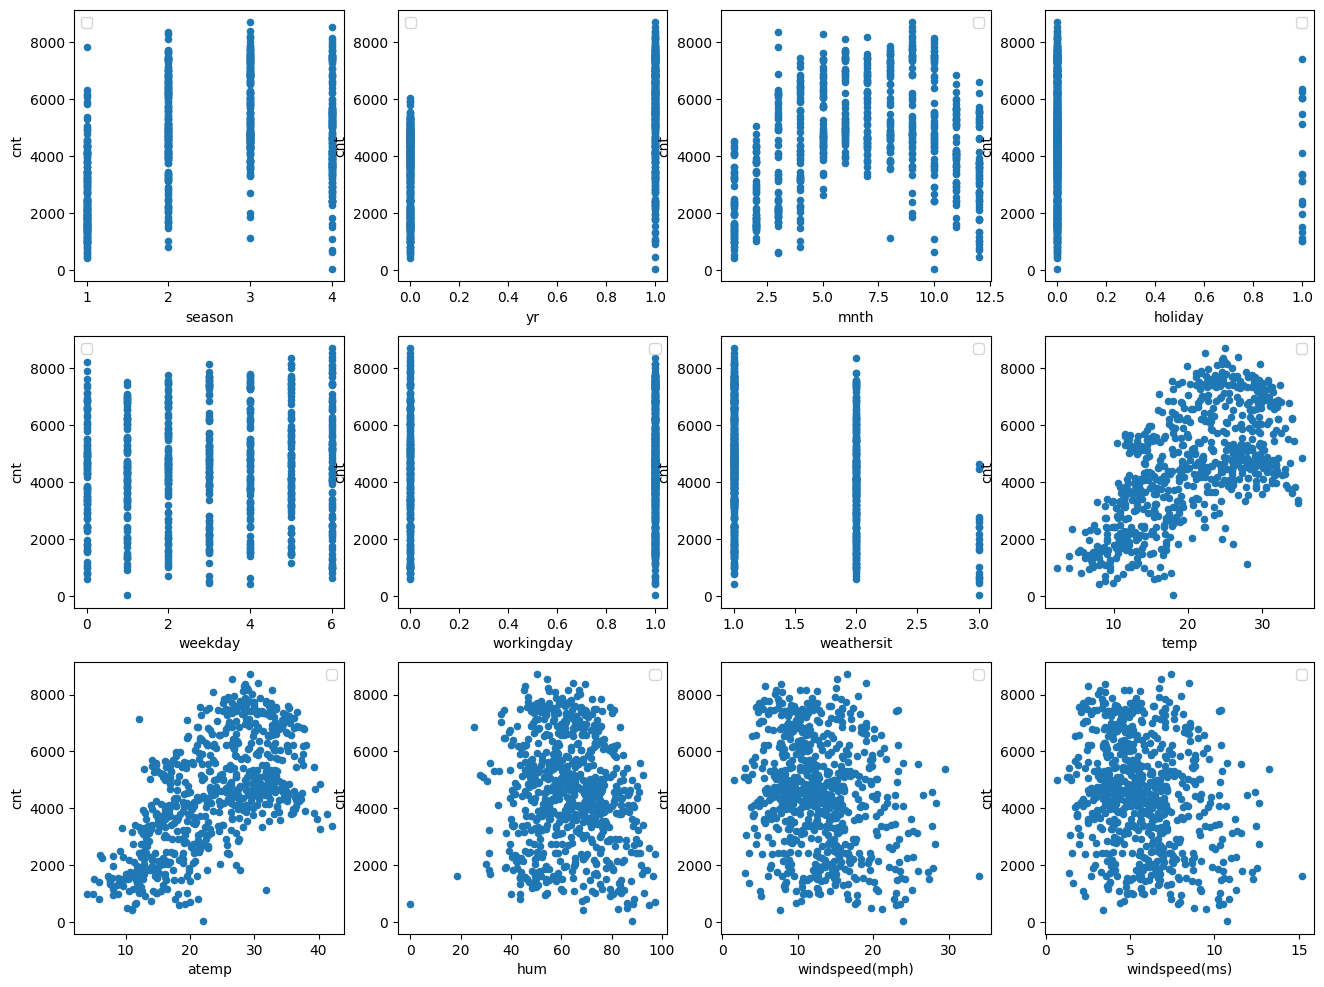

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

### 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?





ответ: чем ближе к середине весны или лета, тем сильнее растёт спрос

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.



<Figure size 1000x600 with 0 Axes>

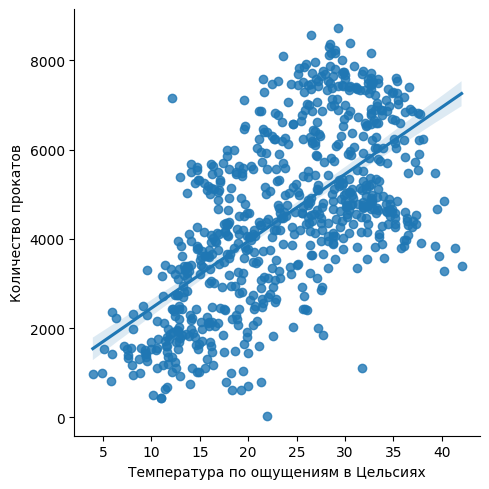

In [31]:
# линейная зависимость между числом прокатов и atemp: температура по ощущениям в Цельсиях
plt.figure(figsize=(10, 6))
sns.lmplot(x='atemp', y='cnt', data=df)
plt.xlabel('Температура по ощущениям в Цельсиях')
plt.ylabel('Количество прокатов')
plt.show()

Ответ:

### 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.



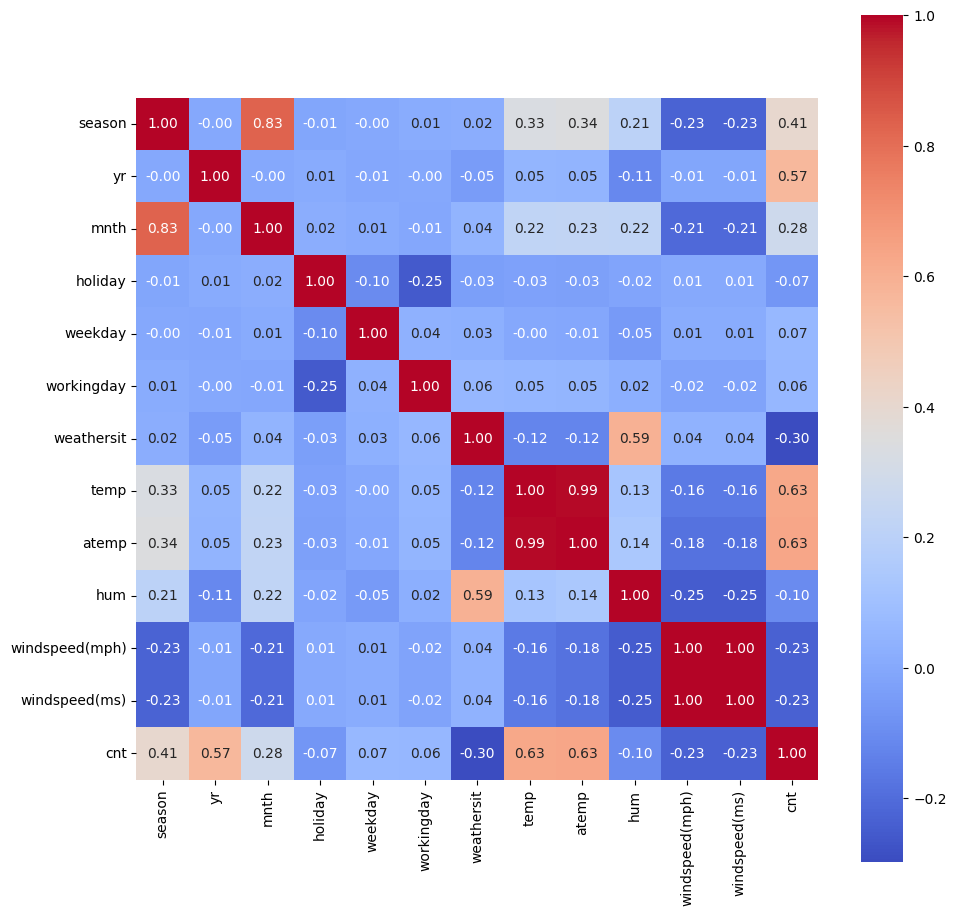

In [32]:
import seaborn as sns
from matplotlib import pyplot as plt

corr = df.corr()

plt.figure(figsize=(11, 11)) # изменим размер графика,
sns.heatmap(corr, square=True, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ:

меньше:

1. Рабочий день;
2. Праздники;
3. Погода;
4. Влажность;

больше:

1. Температура по ощущениям;
2. Температура действительная;

### 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)



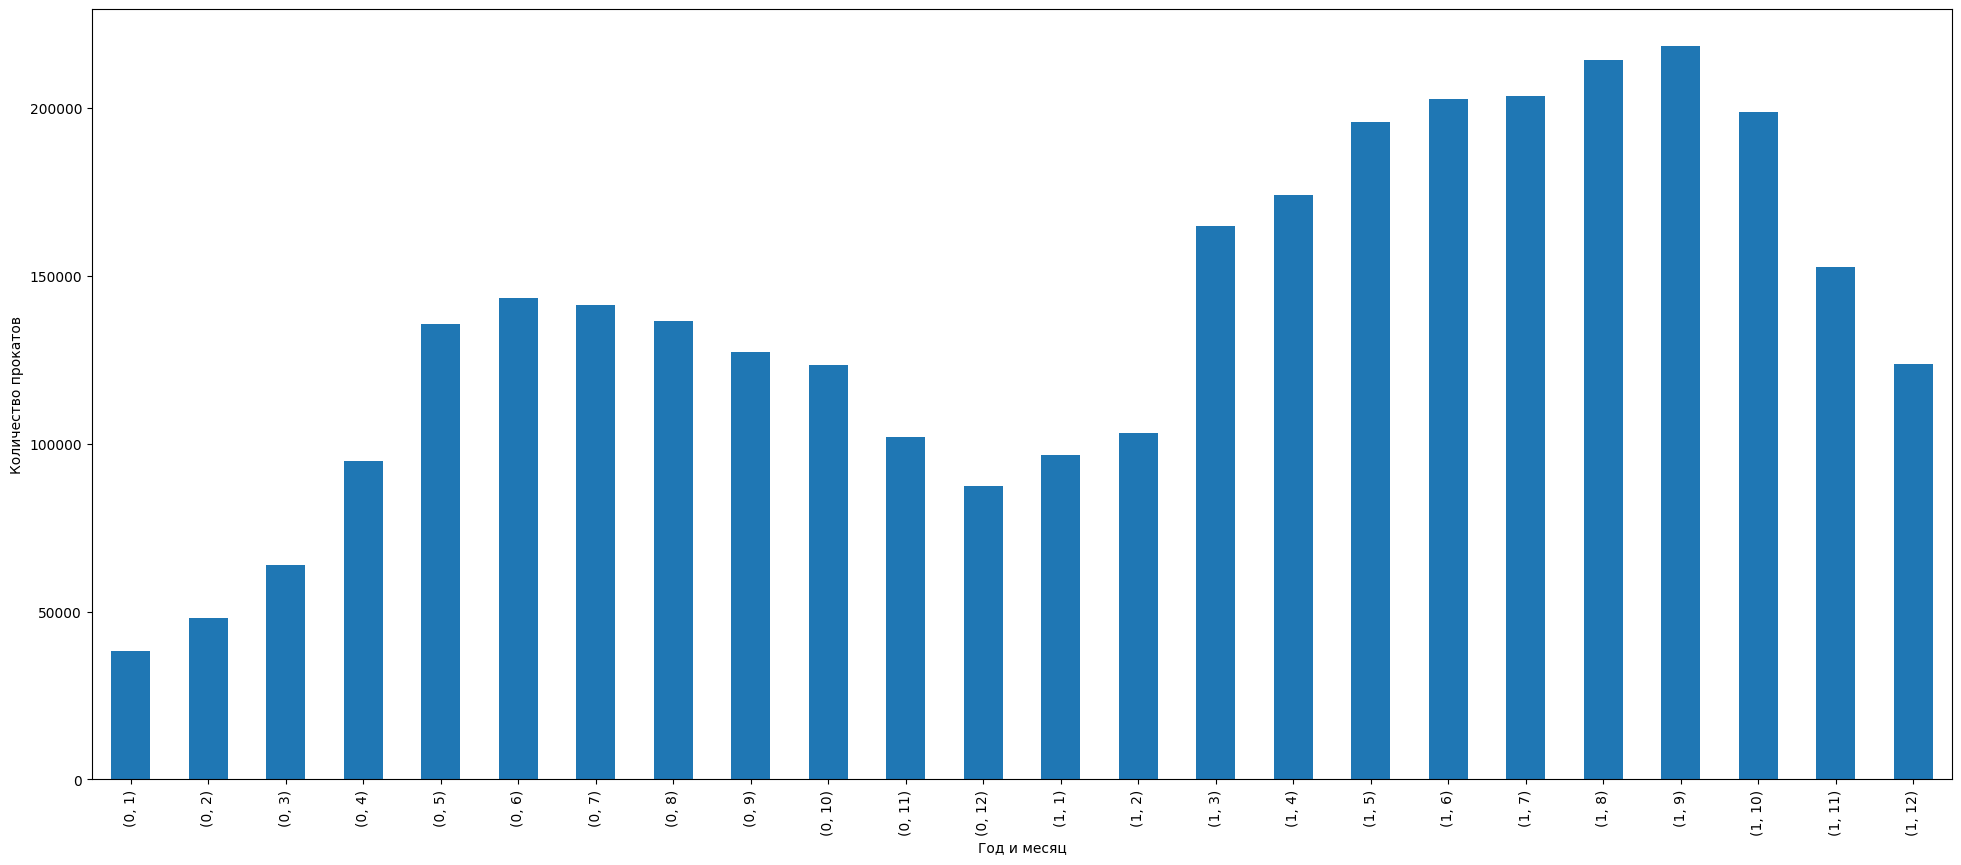

In [37]:
gr_month = df.groupby(['yr', 'mnth'])['cnt'].sum()

gr_month.plot(kind='bar', figsize=(24, 10), stacked=False)
plt.xlabel('Год и месяц')
plt.ylabel('Количество прокатов')
plt.show()

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: увеличение тенденции спроса на прокат велосипедов

### 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,



<Axes: xlabel='workingday', ylabel='count'>

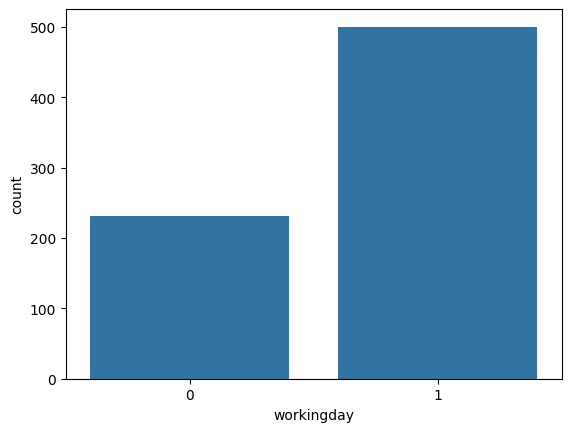

In [39]:
sns.countplot(x='workingday', data=df)

<Axes: xlabel='weathersit', ylabel='count'>

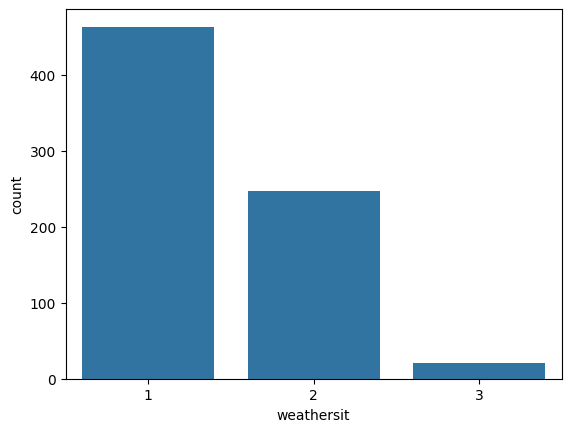

In [24]:
sns.countplot(x='weathersit', data=df)

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.



Ответ:

В данном датасете значеия заданных параметров имеют определенное значение:
1. Для значения рабочий день или нет - workingday: 0 - это рабочий день, а 1 - выходной день;
2. Оценка погоды происходит по балльной шкале - weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман).

Из столбчатой диаграммы можно заметить: как в выходные дни, так и в хорошую погоду, спрос на аренду возрастает.

### 5. Распределение

Постройте распределение целевого признака.


<ipython-input-43-e0160a069452>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cnt'])


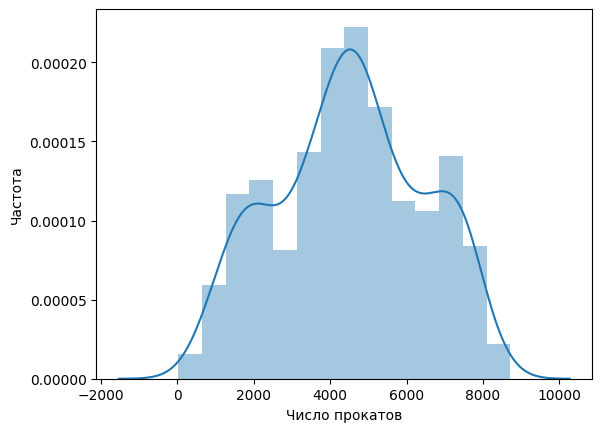

In [43]:
# sns.displot — функция для визуализации распределения данных.
# Она может создавать различные распределения, включая гистограммы, KDE и ECDF.

# KDE (Kernel Density Estimation) -
# непараметрический способ оценить функцию плотности вероятности случайной переменной.
# Он сглаживает точки данных для создания непрерывного вероятностного распределения,
# которое можно визуализировать как кривую в одном измерении или как контуры в двух измерениях.

# ECDF (Empirical Cumulative Distribution Function) —
# это эмпирическая кумулятивная функция распределения.
# Она возвращает функцию эмпирического кумулятивного распределения,
# оценённую в определённом месте с использованием заданных данных.

# Таким образом, KDE позволяет представить общие тенденции в распределении,
# не фокусируясь на деталях, что полезно для анализа широкой структуры набора данных.
# ECDF, в свою очередь, возвращает эмпирическую кумулятивную функцию распределения
# на основе заданных данных.

sns.distplot(df['cnt'])
plt.xlabel('Число прокатов')
plt.ylabel('Частота')
plt.show()


**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

Ответ: судя по синей линии и барному графику на заднем плане, мы получили нормальное распределение



### 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.



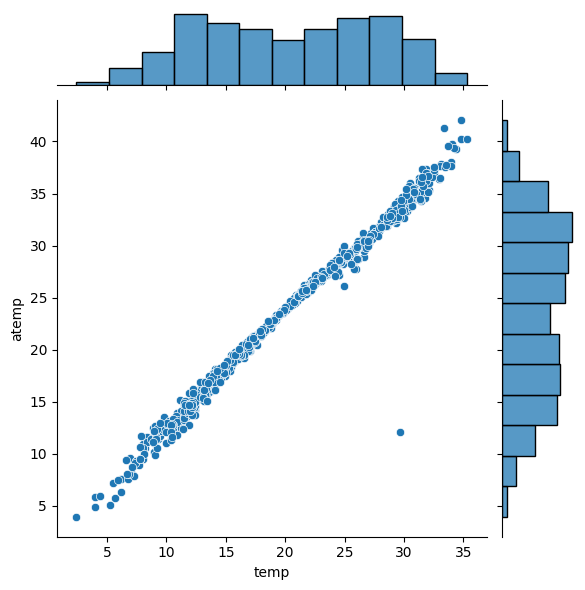

In [44]:
# sns.jointplot() — это функция  для построения попарных взаимосвязей в наборе данных.
# объединяет двумерные графики, регрессионные графики или графики плотности ядра с гистограммами
# или другими представлениями одномерного распределения каждой переменной.
# C его помощью можно понять связь между двумя переменными и их распределение.
# Это помогает выявить корреляции, тенденции, выбросы и закономерности, которые не видны при изучении переменных в изоляции.

sns.jointplot(x='temp', y='atemp', data=df)

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ:

### 7. Боксплот (ящик с усами)

Постройте график распределения (боксплот) количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.




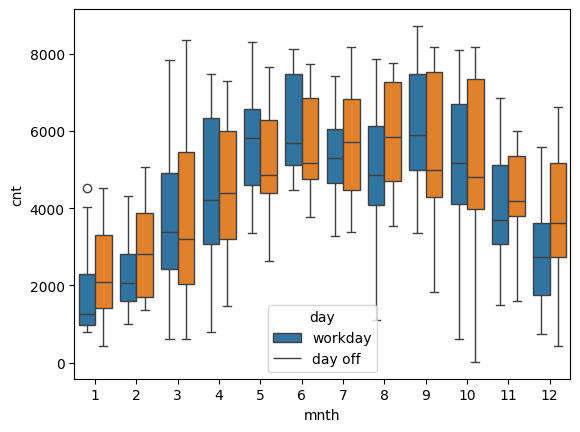

In [46]:
sns.boxplot(x='mnth', y='cnt', hue='workingday', data=df)
plt.legend(title='day', labels=['workday', 'day off'])
plt.show()

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.

Ответ: т.к. погода в позднее весеннее время и ранее осеннее время зачастую является более благоприятной, добираться до работы значительно эффективнее на велосипеде

## Комплексное задание №3. Визуальный анализ данных. Часть 2

In [48]:
!pip install seaborn==0.11.0
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.2
    Uninstalling seaborn-0.13.2:
      Successfully uninstalled seaborn-0.13.2


In [47]:
colab = False # если работаете на своём компьютере, в локальной среде, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

В этом задании Вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

Исходные данные загрузите самостоятельно!

In [49]:
df = pd.read_csv('/content/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Ход задания:

#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


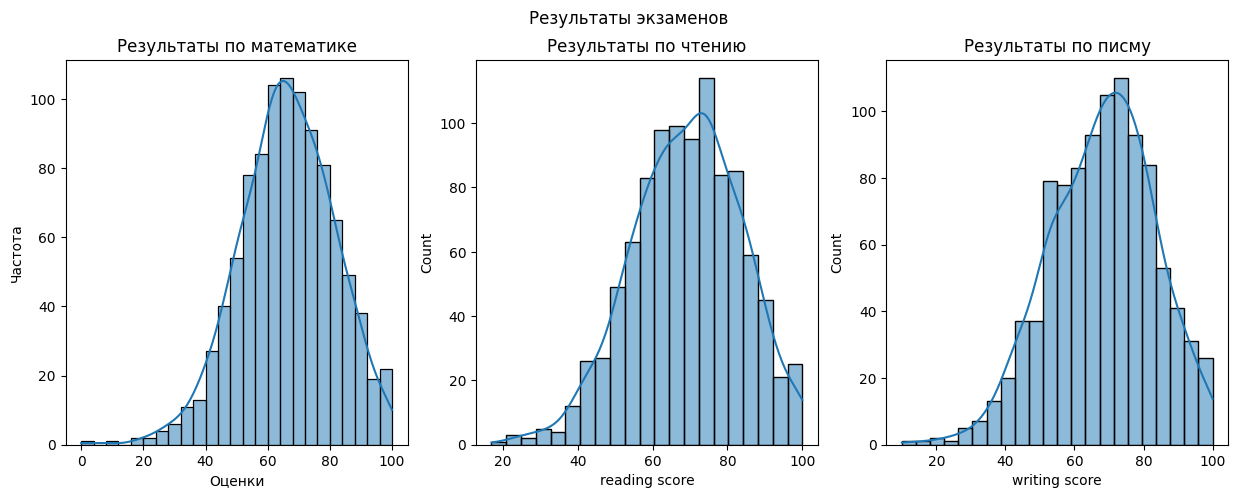

Медианное значение для результатов экзамена по:
математике - 66.0
чтению - 70.0
математике - 69.0


In [51]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Результаты экзаменов')

sns.histplot(df['math score'].dropna(), ax=axes[0], kde=True)
axes[0].set_title('Результаты по математике')
axes[0].set_xlabel('Оценки')
axes[0].set_ylabel('Частота')

sns.histplot(df['reading score'].dropna(), ax=axes[1], kde=True)
axes[1].set_title('Результаты по чтению')
axes[0].set_xlabel('Оценки')
axes[0].set_ylabel('Частота')

# График для результатов по письму
sns.histplot(df['writing score'].dropna(), ax=axes[2], kde=True)
axes[2].set_title('Результаты по писму')
axes[0].set_xlabel('Оценки')
axes[0].set_ylabel('Частота')
plt.show()

math_median = df['math score'].median()
reading_median = df['reading score'].median()
writing_median = df['writing score'].median()

print("Медианное значение для результатов экзамена по:")
print(f'математике - {math_median}')
print(f'чтению - {reading_median}')
print(f'математике - {writing_median}')

#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


Уровни образования родителей:
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


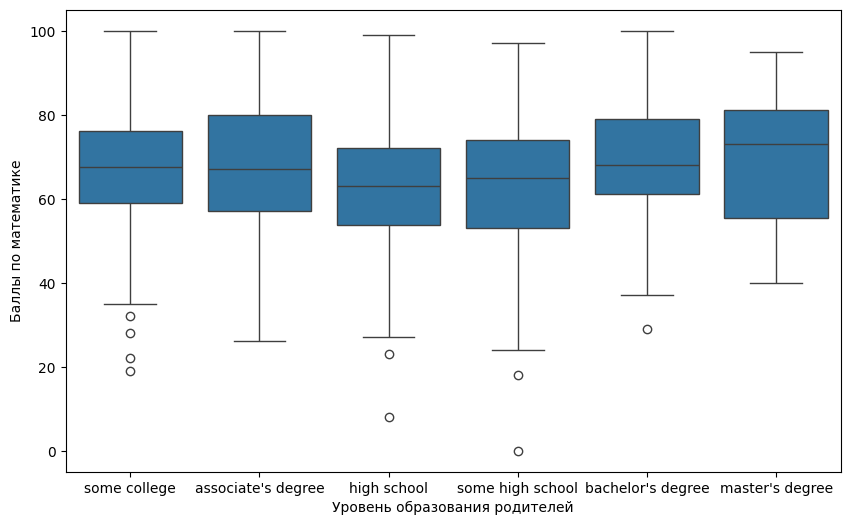

In [54]:
ed_level = df['parental level of education'].value_counts()

print("Уровни образования родителей:")
print(ed_level)

plt.figure(figsize=(10, 6))
sns.boxplot(x='parental level of education', y='math score', data=df, order=df['parental level of education'].value_counts().index)
plt.xlabel('Уровень образования родителей')
plt.ylabel('Баллы по математике')
plt.show()

Ответ: как можно замтетить по резульатам из графика, лучшие результаты по математике у детей, чьи родители имеют магистерскую степень, ниже баллы, чем у других имеют дети, чьи родители просто закончили старшую школу.

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [56]:
scorers_90 = sum((df['gender'] == 'female') & (df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score'] > 90))

print(f'Число студенток, набравших больше 90 баллов по всем предметам: {scorers_90}')

Число студенток, набравших больше 90 баллов по всем предметам: 17


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [58]:
import numpy as np
df.groupby('gender')[['math score', 'reading score', 'writing score']].agg(['min', 'max', 'median'])

math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0

#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете  [pd.agg()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html))

In [59]:
df.groupby(['gender', 'lunch', 'test preparation course'])[['math score', 'reading score', 'writing score']].agg(['mean'])

math score reading score  \
                                                  mean          mean   
gender lunch        test preparation course                            
female free/reduced completed                60.785714     73.428571   
                    none                     52.890756     63.831933   
       standard     completed                71.131579     79.798246   
                    none                     66.530233     73.386047   
male   free/reduced completed                65.639344     65.786885   
                    none                     60.609524     59.076190   
       standard     completed                75.955752     72.601770   
                    none                     69.832512     64.719212   

                                            writing score  
                                                     mean  
gender lunch        test preparation course                
female free/reduced completed                   74.371429  
                    none                        61.781513  
       standard     completed                   81.508772  
                    none                        72.967442  
male   free/reduced completed                   65.737705  
                    none                        55.285714  
       standard     completed                   71.982301  
                    none                        61.906404

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

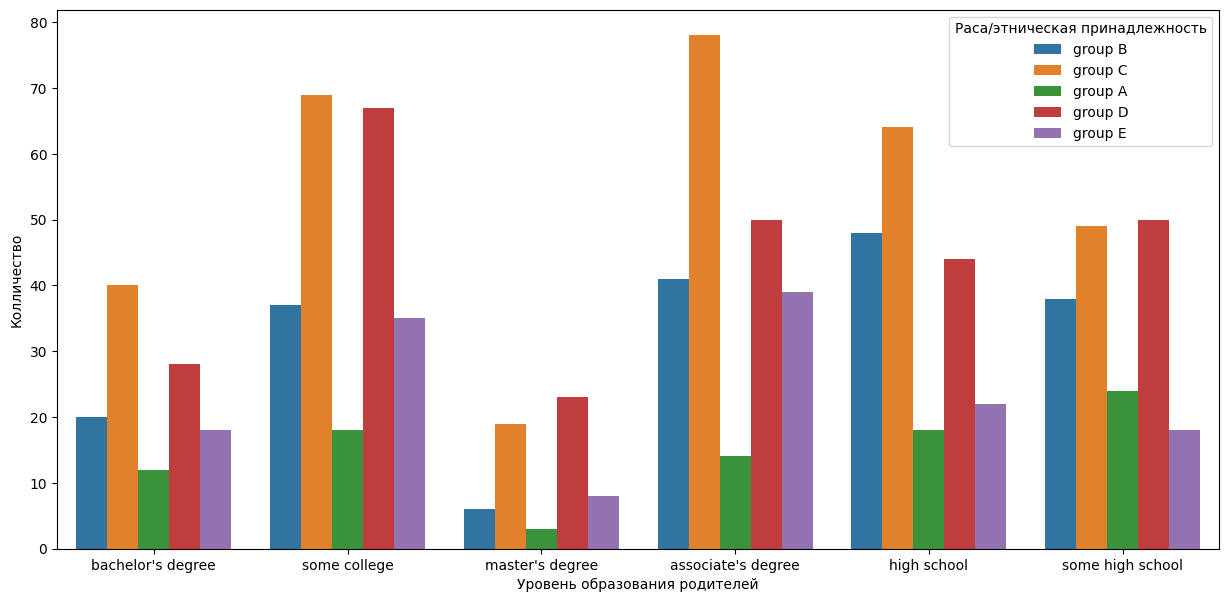

In [60]:
plt.figure(figsize=(15, 7))
sns.countplot(x='parental level of education', data=df, hue='race/ethnicity') # можно указать hue для группировки
plt.xlabel('Уровень образования родителей')
plt.ylabel('Колличество')
plt.legend(title='Раса/этническая принадлежность')
plt.show()

<Figure size 600x600 with 0 Axes>

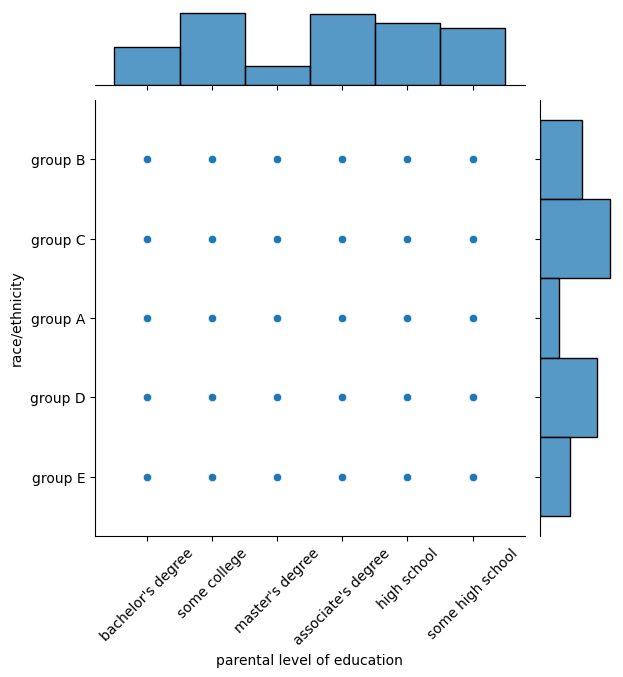

In [62]:
plt.figure(figsize=(6, 6))
sns.jointplot(x='parental level of education', y='race/ethnicity', data=df)
plt.xticks(rotation=45)
plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

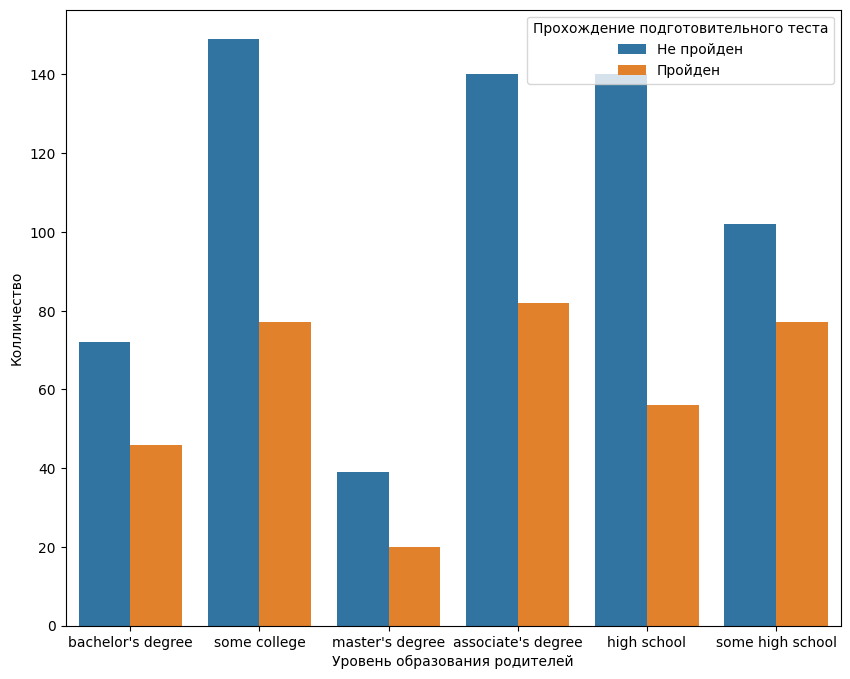

In [63]:
plt.figure(figsize=(10, 8))
sns.countplot(x='parental level of education', data=df, hue='test preparation course') # можно указать hue для группировки
plt.xlabel('Уровень образования родителей')
plt.ylabel('Колличество')
plt.legend(title='Прохождение подготовительного теста', labels=['Не пройден', 'Пройден'])
plt.show()

Ответ: дети, родители которых закончили только старшую школу.

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

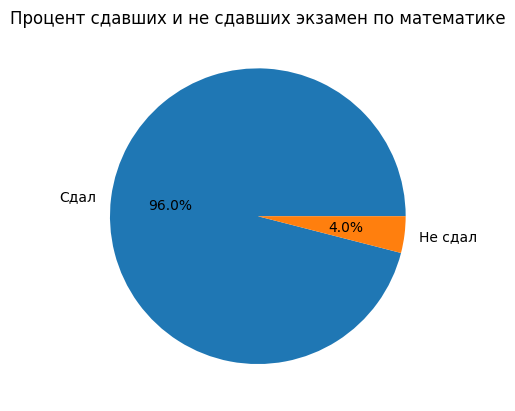

In [64]:
# Значения
df['score_math'] = df['math score'].apply(lambda x: 'Сдал' if x >= 40 else 'Не сдал')
counts = df['score_math'].value_counts()

# Построение круговой диаграммы
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')

# Название графика
plt.title('Процент сдавших и не сдавших экзамен по математике')

# Отображение графика
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

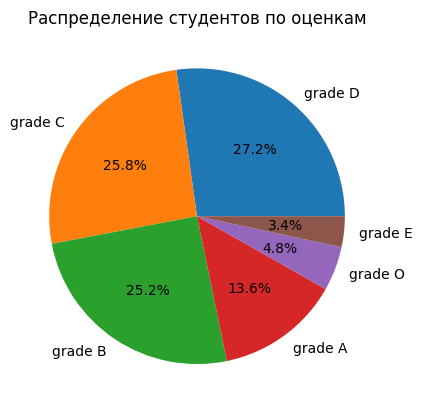

In [65]:
# Значения https://hassanfarid.hashnode.dev/simplifying-long-nested-if-else-ladders
df['score_mean'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
def assign_grade(marks):
    if marks['score_mean'] >= 91:
        return 'grade O'
    elif 81 <= marks['score_mean'] <= 90:
        return 'grade A'
    elif 71 <= marks['score_mean'] <= 80:
        return 'grade B'
    elif 61 <= marks['score_mean'] <= 70:
        return 'grade C'
    elif 41 <= marks['score_mean'] <= 60:
        return 'grade D'
    elif marks['score_mean'] <= 40:
        return 'grade E'

df['score'] = df.apply(assign_grade, axis=1)
score_st = df['score'].value_counts()

# Построение круговой диаграммы
plt.pie(score_st, labels=score_st.index, autopct='%1.1f%%')

# Название графика
plt.title('Распределение студентов по оценкам')

# Отображение графика
plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

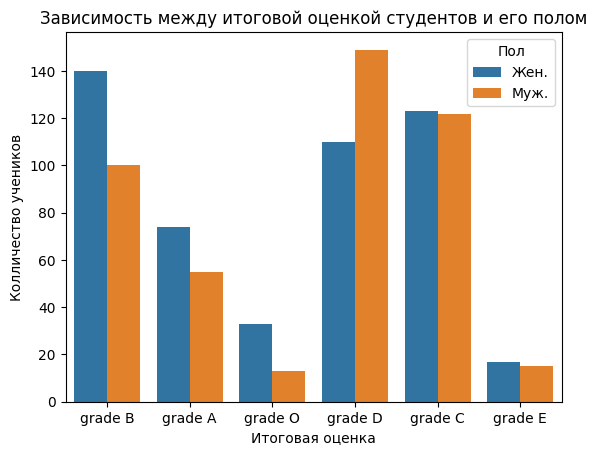

In [66]:
sns.countplot(x='score', data=df, hue='gender') # можно указать hue для группировки
plt.title('Зависимость между итоговой оценкой студентов и его полом')
plt.xlabel('Итоговая оценка')
plt.ylabel('Колличество учеников')
plt.legend(title='Пол', labels=['Жен.', 'Муж.'])
plt.show()

Ответ: студенты женского пола.